In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
pwd

'C:\\Users\\nithinkrishna\\Desktop\\kaggel dataset\\To Insofe\\To Insofe\\Casestudy'

In [3]:
re_ad=pd.read_excel("Readmission dataset.xlsx",na_values=["?",",","#","unknown"])

In [4]:
re_ad.shape

(36538, 43)

In [5]:
re_ad.head()

,Patient_Nbr,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,Readmitted
0,8390,Caucasian,Male,[70-80),Unknown,Not Available,Discharged,Not Available,Below 3,Unknown,...,No,No,No,No,No,No,No,No,No,Yes
1,20012,Caucasian,Male,[60-70),Unknown,Not Available,Discharged,Not Available,Between 03 to 06,HM,...,No,Steady,No,No,No,No,No,No,Yes,Yes
2,50903,Caucasian,Female,[70-80),Unknown,Emergency,Discharged,Referral,Between 03 to 06,Unknown,...,No,No,No,No,No,No,No,No,No,Yes
3,50636,Caucasian,Male,[50-60),Unknown,Not Available,Left AMA,Emergency Room,Below 3,Unknown,...,No,Steady,No,No,No,No,No,No,Yes,No
4,205,Caucasian,Female,[40-50),Unknown,Emergency,Discharged,Emergency Room,Below 3,HM,...,No,Up,No,No,No,No,No,Ch,Yes,No


In [6]:
test_re_ad=pd.read_excel("Readmission dataset - Score.xlsx",na_values=["?",",","#","unknown"])

In [7]:
test_re_ad.shape

(2035, 42)

In [8]:
test_re_ad.head()

,Patient_Nbr,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,...,Examide,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed
0,12866,Caucasian,Male,[80-90),Unknown,Not Available,Discharged,Referral,Above 9,Unknown,...,No,No,Steady,No,No,No,No,No,Ch,Yes
1,27788,Caucasian,Male,[50-60),Unknown,Emergency,Discharged,Emergency Room,Between 03 to 06,MC,...,No,No,Down,No,No,No,No,No,Ch,Yes
2,50211,Caucasian,Female,[40-50),Unknown,Emergency,Discharged,Referral,Below 3,HM,...,No,No,No,No,No,No,No,No,No,No
3,79,Caucasian,Male,[80-90),Unknown,Emergency,Discharged,Emergency Room,Between 03 to 06,MC,...,No,No,No,No,No,No,No,No,No,Yes
4,47633,Caucasian,Female,[70-80),Unknown,Not Available,Discharged,Not Available,Between 03 to 06,Unknown,...,No,No,No,No,No,No,No,No,No,Yes


# EDA

# it is clear from the below plot that the Readmitted patients are low in data provided by the hospital

In [9]:
 import seaborn as sns

Yes    25432
No     11106
Name: Readmitted, dtype: int64
Percentage of people who have taken the readmission: 0.0 %


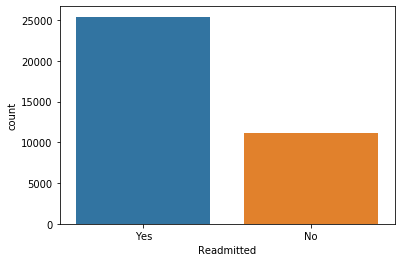

In [10]:
# Plot Distribution
sns.countplot(x='Readmitted',data=re_ad)


# What are the counts?
print(re_ad.Readmitted.value_counts())

# What is the percentage?
count_yes = len(re_ad[re_ad.Readmitted == 'yes'])
count_no = len(re_ad[re_ad.Readmitted != 'yes'])

percent_success = (count_yes/(count_yes + count_no))*100

print('Percentage of people who have taken the readmission:', percent_success, "%")

In [11]:
re_ad.groupby('Readmitted').mean()

,Patient_Nbr,Num_Lab_Procedures,Num_Procedures,Num_Medications
Readmitted,,,,
No,29239.499190,42.254007,1.332973,15.129750
Yes,29207.575889,44.476054,1.332219,16.390335


# if the patient is staying in the hospital for a span of 3 to 6 days there is a possibility that he can be readmitted

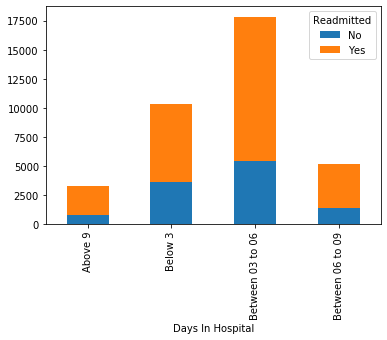

In [12]:
counts= re_ad.groupby(['Days In Hospital', 'Readmitted']).Readmitted.count().unstack()
counts.plot(kind='bar',stacked=True)

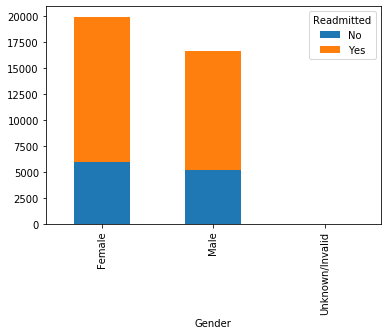

In [13]:
c= re_ad.groupby(['Gender', 'Readmitted']).Readmitted.count().unstack()
c.plot(kind='bar',stacked=True)

# females are more likely to be re-admitted than males

In [14]:
print(c)


Readmitted           No      Yes
Gender                          
Female           5955.0  13958.0
Male             5150.0  11474.0
Unknown/Invalid     1.0      NaN


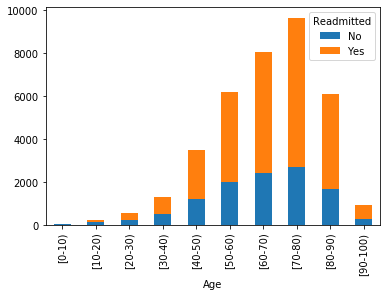

In [15]:
a= re_ad.groupby(['Age', 'Readmitted']).Readmitted.count().unstack()
a.plot(kind='bar',stacked=True)

# high readmission rate is within the age group of 70-80 which goes upto 6977 

In [16]:
print(a)

Readmitted    No   Yes
Age                   
[0-10)        41     9
[10-20)      135    90
[20-30)      214   332
[30-40)      487   815
[40-50)     1184  2302
[50-60)     1996  4200
[60-70)     2433  5630
[70-80)     2680  6977
[80-90)     1672  4415
[90-100)     264   662


# HIGH RATE OF READMISSION FOR THE PATIENTS WHO HAVE EXPERINECED A "SURGERY" IN THAT HOSPITAL WHICH GOES UPTO 12373

Readmitted           No    Yes
Medical_Specialty             
Cardiology          799   2064
Emergency           549   1703
General Practice    950   2543
InternalMedicine   2072   4302
Nephrology          165    594
Orthopedics         644    637
Others              761   1025
Radiology            95    191
Surgery            5071  12373


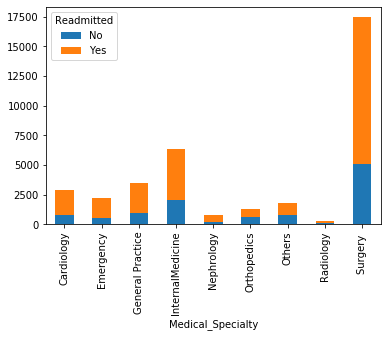

In [17]:
m= re_ad.groupby(['Medical_Specialty', 'Readmitted']).Readmitted.count().unstack()
m.plot(kind='bar',stacked=True)
print(m)

# Caucasian RACE  has been the dominant race in terms of the readmission from the data provided by the hospital

Readmitted         No    Yes
Race                        
AfricanAmerican  2573   5024
Asian              56    111
Caucasian        7788  19212
Hispanic          215    475
Other             164    297
Unknown           310    313


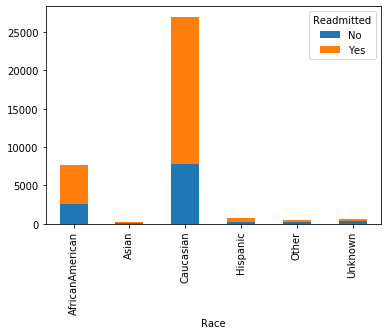

In [18]:
R= re_ad.groupby(['Race', 'Readmitted']).Readmitted.count().unstack()
R.plot(kind='bar',stacked=True)
print(R)

# if a person has gone past more than 5 diagnoses he is likely to be re-admitted,because there is a chance of he being tested positive for one or the other test he has been tested for.

Readmitted          No    Yes
Number_Diagnoses             
Above 5           6721  22747
Below 3            309     55
Between 03 to 05  4076   2630


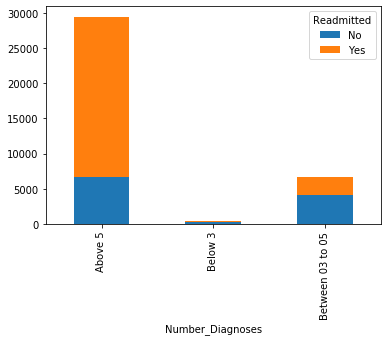

In [19]:
e= re_ad.groupby(['Number_Diagnoses', 'Readmitted']).Readmitted.count().unstack()
e.plot(kind='bar',stacked=True)
print(e)

# The readmission seems to be high for the patient who has gone through a medication of 13,so we can have insight that if a patient has 13 medications he is likely to be readmitted more often than not

Readmitted          No     Yes
Num_Medications               
1                 29.0    57.0
2                 86.0    75.0
3                151.0   143.0
4                234.0   248.0
5                302.0   380.0
6                372.0   561.0
7                437.0   790.0
8                577.0  1041.0
9                603.0  1180.0
10               606.0  1317.0
11               695.0  1465.0
12               674.0  1490.0
13               665.0  1606.0
14               561.0  1471.0
15               586.0  1476.0
16               589.0  1465.0
17               480.0  1309.0
18               461.0  1180.0
19               398.0  1058.0
20               351.0   981.0
21               297.0   826.0
22               270.0   732.0
23               225.0   644.0
24               193.0   535.0
25               175.0   473.0
26               159.0   421.0
27               140.0   379.0
28                94.0   307.0
29                87.0   265.0
30                83.0   210.0
...     

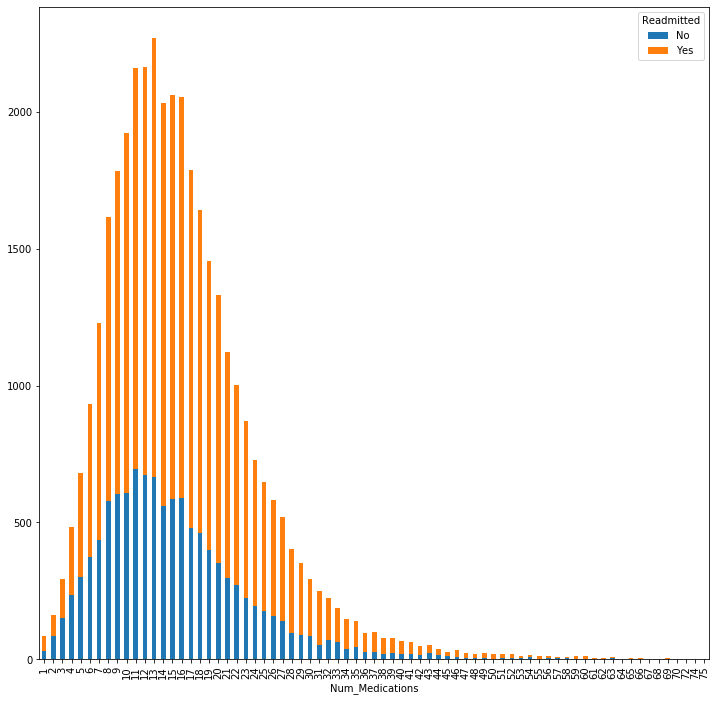

In [20]:
a= re_ad.groupby(['Num_Medications', 'Readmitted']).Readmitted.count().unstack()
a.plot(kind='bar',stacked=True,figsize=(12,12))
print(a)

# if a person undergoes Diabetes medication he is  more likely to be readmitted

Readmitted     No    Yes
Diabetesmed             
No           2310   6831
Yes          8796  18601


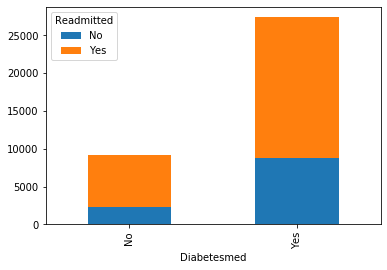

In [21]:
t= re_ad.groupby(['Diabetesmed', 'Readmitted']).Readmitted.count().unstack()
t.plot(kind='bar',stacked=True)
print(t)

In [22]:
re_ad.describe()

,Patient_Nbr,Num_Lab_Procedures,Num_Procedures,Num_Medications
count,36538.000000,36538.000000,36538.000000,36538.000000
mean,29217.279216,43.800646,1.332448,16.007171
std,16904.104318,19.137932,1.681195,8.109806
min,1.000000,1.000000,0.000000,1.000000
25%,14562.250000,32.000000,0.000000,10.000000
50%,29216.000000,45.000000,1.000000,15.000000
75%,43831.750000,57.000000,2.000000,20.000000
max,58504.000000,114.000000,6.000000,75.000000


In [23]:
re_ad.describe(include='object')

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,Readmitted
count,36538,36538,36538,36538,36538,36538,36538,36538,36538,36538,...,36538,36538,36538,36538,36538,36538,36538,36538,36538,36538
unique,6,3,10,10,5,6,4,4,5,9,...,1,4,4,2,1,1,1,2,2,2
top,Caucasian,Female,[70-80),Unknown,Emergency,Discharged,Emergency Room,Between 03 to 06,Unknown,Surgery,...,No,No,No,No,No,No,No,No,Yes,Yes
freq,27000,19913,9657,35137,25389,33919,19594,17838,18730,17444,...,36538,18715,36325,36534,36538,36538,36538,20205,27397,25432


# Train data preprocessing for hospital re-admission classification

In [24]:
categorical_columns=re_ad.select_dtypes(include=['object'])

In [25]:
categorical_columns.head()

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,Readmitted
0,Caucasian,Male,[70-80),Unknown,Not Available,Discharged,Not Available,Below 3,Unknown,Surgery,...,No,No,No,No,No,No,No,No,No,Yes
1,Caucasian,Male,[60-70),Unknown,Not Available,Discharged,Not Available,Between 03 to 06,HM,Surgery,...,No,Steady,No,No,No,No,No,No,Yes,Yes
2,Caucasian,Female,[70-80),Unknown,Emergency,Discharged,Referral,Between 03 to 06,Unknown,General Practice,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[50-60),Unknown,Not Available,Left AMA,Emergency Room,Below 3,Unknown,Surgery,...,No,Steady,No,No,No,No,No,No,Yes,No
4,Caucasian,Female,[40-50),Unknown,Emergency,Discharged,Emergency Room,Below 3,HM,Surgery,...,No,Up,No,No,No,No,No,Ch,Yes,No


In [26]:
numerical_columns=re_ad.select_dtypes(include=['int64'])

In [27]:
numerical_columns.head()

,Patient_Nbr,Num_Lab_Procedures,Num_Procedures,Num_Medications
0,8390,55,4,8
1,20012,17,0,10
2,50903,36,0,2
3,50636,48,0,4
4,205,64,0,11


In [28]:
numerical_columns.drop(['Patient_Nbr'],axis=1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [29]:
numerical_columns.head()

,Num_Lab_Procedures,Num_Procedures,Num_Medications
0,55,4,8
1,17,0,10
2,36,0,2
3,48,0,4
4,64,0,11


In [30]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
for i in categorical_columns:
    le1.fit(categorical_columns[i])
    categorical_columns[i] = le1.transform(categorical_columns[i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
categorical_columns.head()

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,Readmitted
0,2,1,7,1,3,1,1,1,4,8,...,0,1,1,0,0,0,0,1,0,1
1,2,1,6,1,3,1,1,2,1,8,...,0,2,1,0,0,0,0,1,1,1
2,2,0,7,1,1,1,2,2,4,2,...,0,1,1,0,0,0,0,1,0,1
3,2,1,5,1,3,3,0,1,4,8,...,0,2,1,0,0,0,0,1,1,0
4,2,0,4,1,1,1,0,1,1,8,...,0,3,1,0,0,0,0,0,1,0


In [32]:
final_re_ad=pd.concat([numerical_columns,categorical_columns],axis=1)

In [33]:
final_re_ad.shape

(36538, 42)

# preprocessing of the test data given

In [34]:
test_re_ad.head()

,Patient_Nbr,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,...,Examide,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed
0,12866,Caucasian,Male,[80-90),Unknown,Not Available,Discharged,Referral,Above 9,Unknown,...,No,No,Steady,No,No,No,No,No,Ch,Yes
1,27788,Caucasian,Male,[50-60),Unknown,Emergency,Discharged,Emergency Room,Between 03 to 06,MC,...,No,No,Down,No,No,No,No,No,Ch,Yes
2,50211,Caucasian,Female,[40-50),Unknown,Emergency,Discharged,Referral,Below 3,HM,...,No,No,No,No,No,No,No,No,No,No
3,79,Caucasian,Male,[80-90),Unknown,Emergency,Discharged,Emergency Room,Between 03 to 06,MC,...,No,No,No,No,No,No,No,No,No,Yes
4,47633,Caucasian,Female,[70-80),Unknown,Not Available,Discharged,Not Available,Between 03 to 06,Unknown,...,No,No,No,No,No,No,No,No,No,Yes


In [35]:
cat_columns=test_re_ad.select_dtypes(include=['object'])

In [36]:
cat_columns.shape

(2035, 38)

In [37]:
num_columns=test_re_ad.select_dtypes(include=['int64'])

In [38]:
num_columns.head()

,Patient_Nbr,Num_Lab_Procedures,Num_Procedures,Num_Medications
0,12866,89,2,27
1,27788,33,6,8
2,50211,26,1,11
3,79,62,0,14
4,47633,23,0,7


In [39]:
num_columns.drop(['Patient_Nbr'],axis=1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [40]:
num_columns.head()

,Num_Lab_Procedures,Num_Procedures,Num_Medications
0,89,2,27
1,33,6,8
2,26,1,11
3,62,0,14
4,23,0,7


In [41]:
num_columns.head()

,Num_Lab_Procedures,Num_Procedures,Num_Medications
0,89,2,27
1,33,6,8
2,26,1,11
3,62,0,14
4,23,0,7


In [42]:
from sklearn.preprocessing import LabelEncoder

le2 = LabelEncoder()
for i in cat_columns:
    le2.fit(cat_columns[i])
    cat_columns[i] = le2.transform(cat_columns[i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
cat_columns.head()

,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,Days In Hospital,Payer_Code,Medical_Specialty,...,Examide,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed
0,2,1,8,0,3,1,2,0,4,8,...,0,0,2,0,0,0,0,0,0,1
1,2,1,5,0,1,1,0,2,2,8,...,0,0,0,0,0,0,0,0,0,1
2,2,0,4,0,1,1,2,1,1,6,...,0,0,1,0,0,0,0,0,1,0
3,2,1,8,0,1,1,0,2,2,8,...,0,0,1,0,0,0,0,0,1,1
4,2,0,7,0,3,1,1,2,4,8,...,0,0,1,0,0,0,0,0,1,1


In [44]:
cat_columns.shape

(2035, 38)

In [45]:
test_final_re_ad=pd.concat([num_columns,cat_columns],axis=1)

In [46]:
test_final_re_ad.shape

(2035, 41)

In [47]:
test_final_re_ad.head()

,Num_Lab_Procedures,Num_Procedures,Num_Medications,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,...,Examide,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed
0,89,2,27,2,1,8,0,3,1,2,...,0,0,2,0,0,0,0,0,0,1
1,33,6,8,2,1,5,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,26,1,11,2,0,4,0,1,1,2,...,0,0,1,0,0,0,0,0,1,0
3,62,0,14,2,1,8,0,1,1,0,...,0,0,1,0,0,0,0,0,1,1
4,23,0,7,2,0,7,0,3,1,1,...,0,0,1,0,0,0,0,0,1,1


# Model building

In [48]:
X = final_re_ad.loc[:,final_re_ad.columns!='Readmitted'].values
Y = final_re_ad.loc[:,'Readmitted'].values
print('X.shape: ', X.shape)
print('Y.shape: ', Y.shape)

X.shape:  (36538, 41)
Y.shape:  (36538,)


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [51]:
from xgboost import XGBClassifier

In [52]:
XGB_model = XGBClassifier(n_estimators=500, gamma=0.5,learning_rate=0.1)

In [53]:
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [54]:
y_train_xg_pred=XGB_model.predict(X_train)
y_val_xg_pred=XGB_model.predict(X_test)

In [55]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix

In [56]:
print(accuracy_score(y_test,y_val_xg_pred))
print(classification_report(y_test,y_val_xg_pred,digits=4))

0.779237365444262
              precision    recall  f1-score   support

           0     0.6981    0.4762    0.5662      3316
           1     0.8003    0.9107    0.8520      7646

    accuracy                         0.7792     10962
   macro avg     0.7492    0.6934    0.7091     10962
weighted avg     0.7694    0.7792    0.7655     10962



In [57]:
confusion_matrix_test = confusion_matrix(y_test,y_val_xg_pred)
confusion_matrix_train = confusion_matrix(y_train, y_train_xg_pred)

In [58]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)


Train TNR:  0.521181001283697
Train TPR:  0.9204992690880468
Train Accuracy:  0.7988739443228027


# Test predictions of XG model has been the best of the all the other models built ,as it has the balanced TPR and TNR than the other ,which in return reduces the false negatives in the model which are area of the focus is 

In [59]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.4761761158021713
Test TPR:  0.9106722469264975
Test Accuracy:  0.779237365444262


# Test predictions on the unseen test data

In [75]:
predictions=XGB_model.predict(test_final_re_ad.values)

In [76]:
predictions

array([0, 1, 1, ..., 1, 1, 1])

In [77]:
test_final_re_ad['predictions']=predictions

In [78]:
test_final_re_ad.head()

,Num_Lab_Procedures,Num_Procedures,Num_Medications,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,predictions
0,89,2,27,2,1,8,0,3,1,2,...,0,2,0,0,0,0,0,0,1,0
1,33,6,8,2,1,5,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
2,26,1,11,2,0,4,0,1,1,2,...,0,1,0,0,0,0,0,1,0,1
3,62,0,14,2,1,8,0,1,1,0,...,0,1,0,0,0,0,0,1,1,1
4,23,0,7,2,0,7,0,3,1,1,...,0,1,0,0,0,0,0,1,1,0


# Grid search for XGB classifier model

In [79]:
XGB = XGBClassifier(n_jobs=-1)

param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 2),
     'n_estimators':[100,50],
     'max_depth': [10, 15]
}

 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)

In [80]:
CV_XGB.fit(X = X_train, y=y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': array([0.5, 0.9]),
                         'max_depth': [10, 15], 'n_estimators': [100, 50]},
             pre_dispatch

In [84]:
y_train_xg_pred_CV=CV_XGB.predict(X_train)
y_val_xg_pred_CV=CV_XGB.predict(X_test)

In [83]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score,confusion_matrix

In [86]:
confusion_matrix_test_CV = confusion_matrix(y_test,y_val_xg_pred_CV)
confusion_matrix_train_CV = confusion_matrix(y_train, y_train_xg_pred_CV)

In [87]:
Accuracy_Train=(confusion_matrix_train_CV[0,0]+confusion_matrix_train_CV[1,1])/(confusion_matrix_train_CV[0,0]+confusion_matrix_train_CV[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train_CV[0,0]/(confusion_matrix_train_CV[0,0]+confusion_matrix_train_CV[0,1])
TPR_Train= confusion_matrix_train_CV[1,1]/(confusion_matrix_train_CV[1,0]+confusion_matrix_train_CV[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.6002567394094993
Train TPR:  0.96114921848645
Train Accuracy:  0.8512277134813888


In [88]:

Accuracy_Test=(confusion_matrix_test_CV[0,0]+confusion_matrix_test_CV[1,1])/(confusion_matrix_test_CV[0,0]+confusion_matrix_test_CV[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test_CV[0,0]/(confusion_matrix_test_CV[0,0] +confusion_matrix_test_CV[0,1])
TPR_Test= confusion_matrix_test_CV[1,1]/(confusion_matrix_test_CV[1,0] +confusion_matrix_test_CV[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.45928829915560915
Test TPR:  0.9223123201674078
Test Accuracy:  0.7822477650063857


# Test predictions of grid_cv_Xg

# SVC model

In [52]:
from sklearn.svm import SVC

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
X = final_re_ad.loc[:,final_re_ad.columns!='Readmitted'].values
Y = final_re_ad.loc[:,'Readmitted'].values
print('X.shape: ', X.shape)
print('Y.shape: ', Y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=123)

In [54]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}

In [57]:
grid_svc = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid_svc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 1.1min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 1.1min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total= 1.2min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  50.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  50.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  51.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  22.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  22.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 49.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [81]:
y_train_svc=grid_svc.predict(X_train)
y_val_svc=grid_svc.predict(X_test)

In [82]:
confusion_matrix_test_svc = confusion_matrix(y_test,y_val_svc)
confusion_matrix_train_svc = confusion_matrix(y_train, y_train_svc)

In [83]:
Accuracy_Train=(confusion_matrix_train_svc[0,0]+confusion_matrix_train_svc[1,1])/(confusion_matrix_train_svc[0,0]+confusion_matrix_train_svc[0,1]+confusion_matrix_train_svc[1,0]+confusion_matrix_train_svc[1,1])
TNR_Train= confusion_matrix_train_svc[0,0]/(confusion_matrix_train_svc[0,0]+confusion_matrix_train_svc[0,1])
TPR_Train= confusion_matrix_train_svc[1,1]/(confusion_matrix_train_svc[1,0]+confusion_matrix_train_svc[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.43928112965340177
Train TPR:  0.947599235353649
Train Accuracy:  0.7927744760713169


In [64]:

Accuracy_Test=(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[1,1])/(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[0,1]+confusion_matrix_test_svc[1,0]+confusion_matrix_test_svc[1,1])
TNR_Test= confusion_matrix_test_svc[0,0]/(confusion_matrix_test_svc[0,0] +confusion_matrix_test_svc[0,1])
TPR_Test= confusion_matrix_test_svc[1,1]/(confusion_matrix_test_svc[1,0] +confusion_matrix_test_svc[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.3425814234016888
Test TPR:  0.9211352341093382
Test Accuracy:  0.7461229702609012


# Logistic regression model

In [60]:
 from sklearn.linear_model import LogisticRegression

In [61]:
Logistic_model=LogisticRegression(random_state=0)

In [62]:
Logistic_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
logistic_train_pred=Logistic_model.predict(X_train)
logistic_test_pred=Logistic_model.predict(X_test)

In [64]:
confusion_matrix_test_logit = confusion_matrix(y_test,logistic_test_pred)
confusion_matrix_train_logit= confusion_matrix(y_train, logistic_train_pred)

In [65]:
Accuracy_Train=(confusion_matrix_train_logit[0,0]+confusion_matrix_train_logit[1,1])/(confusion_matrix_train_logit[0,0]+confusion_matrix_train_logit[0,1]+confusion_matrix_train_logit[1,0]+confusion_matrix_train_logit[1,1])
TNR_Train= confusion_matrix_train_logit[0,0]/(confusion_matrix_train_logit[0,0]+confusion_matrix_train_logit[0,1])
TPR_Train= confusion_matrix_train_logit[1,1]/(confusion_matrix_train_logit[1,0]+confusion_matrix_train_logit[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.362387676508344
Train TPR:  0.9107162937141572
Train Accuracy:  0.7437050359712231


In [66]:
Accuracy_Test=(confusion_matrix_test_logit[0,0]+confusion_matrix_test_logit[1,1])/(confusion_matrix_test_logit[0,0]+confusion_matrix_test_logit[0,1]+confusion_matrix_test_logit[1,0]+confusion_matrix_test_logit[1,1])
TNR_Test= confusion_matrix_test_logit[0,0]/(confusion_matrix_test_logit[0,0] +confusion_matrix_test_logit[0,1])
TPR_Test= confusion_matrix_test_logit[1,1]/(confusion_matrix_test_logit[1,0] +confusion_matrix_test_logit[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.3428829915560917
Test TPR:  0.9148574417996338
Test Accuracy:  0.7418354314906039


# Random forest classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [2,3,5,7],
           "min_samples_leaf" : [2, 4]}

scores = ['precision', 'recall']

In [69]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,cv=5)
CV_rfc.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [70]:
print(CV_rfc.best_score_, CV_rfc.best_params_)

0.7555520800750704 {'max_depth': 7, 'min_samples_leaf': 4, 'n_estimators': 45}


In [71]:
rf_train_pred=CV_rfc.predict(X_train)
rf_test_pred=CV_rfc.predict(X_test)

In [72]:
confusion_matrix_test_RF = confusion_matrix(y_test,rf_test_pred)
confusion_matrix_train_RF= confusion_matrix(y_train, rf_train_pred)

In [73]:
Accuracy_Train=(confusion_matrix_train_RF[0,0]+confusion_matrix_train_RF[1,1])/(confusion_matrix_train_RF[0,0]+confusion_matrix_train_RF[0,1]+confusion_matrix_train_RF[1,0]+confusion_matrix_train_RF[1,1])
TNR_Train= confusion_matrix_train_RF[0,0]/(confusion_matrix_train_RF[0,0]+confusion_matrix_train_RF[0,1])
TPR_Train= confusion_matrix_train_RF[1,1]/(confusion_matrix_train_RF[1,0]+confusion_matrix_train_RF[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.2729139922978177
Train TPR:  0.9727875857415945
Train Accuracy:  0.7596183922427275


In [74]:
Accuracy_Test=(confusion_matrix_test_RF[0,0]+confusion_matrix_test_RF[1,1])/(confusion_matrix_test_RF[0,0]+confusion_matrix_test_RF[0,1]+confusion_matrix_test_RF[1,0]+confusion_matrix_test_RF[1,1])
TNR_Test= confusion_matrix_test_RF[0,0]/(confusion_matrix_test_RF[0,0] +confusion_matrix_test_RF[0,1])
TPR_Test= confusion_matrix_test_RF[1,1]/(confusion_matrix_test_RF[1,0] +confusion_matrix_test_RF[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.25
Test TPR:  0.969918911849333
Test Accuracy:  0.7521437693851487


In [75]:
pred_RF=CV_rfc.predict(test_final_re_ad.values)

In [76]:
test_final_re_ad['pred_RF']=pred_RF

In [77]:
test_final_re_ad.head()

,Num_Lab_Procedures,Num_Procedures,Num_Medications,Race,Gender,Age,Weight,Admission Type,Discharge Disposition,Admission Source,...,Citoglipton,Insulin,Glyburide-Metformin,Glipizide-Metformin,Glimepiride-Pioglitazone,Metformin-Rosiglitazone,Metformin-Pioglitazone,Change,Diabetesmed,pred_RF
0,89,2,27,2,1,8,0,3,1,2,...,0,2,0,0,0,0,0,0,1,1
1,33,6,8,2,1,5,0,1,1,0,...,0,0,0,0,0,0,0,0,1,1
2,26,1,11,2,0,4,0,1,1,2,...,0,1,0,0,0,0,0,1,0,1
3,62,0,14,2,1,8,0,1,1,0,...,0,1,0,0,0,0,0,1,1,1
4,23,0,7,2,0,7,0,3,1,1,...,0,1,0,0,0,0,0,1,1,1


# stacking using 3 of the models above and giving the o/p to the KNN classifier

In [78]:
stack_train = pd.DataFrame([rf_train_pred,logistic_train_pred,y_train_xg_pred])
stack_test = pd.DataFrame([rf_test_pred,logistic_test_pred,y_val_xg_pred])

In [79]:
stack_train = stack_train.T
stack_test = stack_test.T

In [80]:
stack_train.columns = ['rf_train_pred','logistic_train_pred','y_train_xg_pred']
stack_test.columns = ['rf_test_pred','logistic_test_pred','y_val_xg_pred']

In [81]:
print(stack_train.shape)
print(stack_test.shape)

(25576, 3)
(10962, 3)


In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
parameters = {'n_neighbors':list(range(2,10))}

knn_stack = GridSearchCV(KNeighborsClassifier(algorithm = 'auto', metric="euclidean", n_jobs=-1),
                   parameters,verbose=1, cv=10)

knn_stack.fit(stack_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   41.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='euclidean',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [86]:
print(knn_stack.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='uniform')


In [87]:
stacked_pred_train = knn_stack.predict(stack_train)
stacked_pred_test = knn_stack.predict(stack_test)

In [89]:
confusion_matrix_test_stack = confusion_matrix(y_test,stacked_pred_test)
confusion_matrix_train_stack= confusion_matrix(y_train, stacked_pred_train)

In [90]:
Accuracy_Train=(confusion_matrix_train_stack[0,0]+confusion_matrix_train_stack[1,1])/(confusion_matrix_train_stack[0,0]+confusion_matrix_train_stack[0,1]+confusion_matrix_train_stack[1,0]+confusion_matrix_train_stack[1,1])
TNR_Train= confusion_matrix_train_stack[0,0]/(confusion_matrix_train_stack[0,0]+confusion_matrix_train_stack[0,1])
TPR_Train= confusion_matrix_train_stack[1,1]/(confusion_matrix_train_stack[1,0]+confusion_matrix_train_stack[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  0.3277278562259307
Train TPR:  0.9591251546159901
Train Accuracy:  0.7668126368470441


In [91]:
Accuracy_Test=(confusion_matrix_test_stack[0,0]+confusion_matrix_test_stack[1,1])/(confusion_matrix_test_stack[0,0]+confusion_matrix_test_stack[0,1]+confusion_matrix_test_stack[1,0]+confusion_matrix_test_stack[1,1])
TNR_Test= confusion_matrix_test_stack[0,0]/(confusion_matrix_test_stack[0,0] +confusion_matrix_test_stack[0,1])
TPR_Test= confusion_matrix_test_stack[1,1]/(confusion_matrix_test_stack[1,0] +confusion_matrix_test_stack[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.3277278562259307
Test TPR:  0.9591251546159901
Test Accuracy:  1.2309044122261972
